Total number of matrices: 9963
File with largest dimensions: binary_matrix_2198.npy with dimensions (47, 423)
File with smallest dimensions: binary_matrix_8037.npy with dimensions (5, 33)
File with the largest width: binary_matrix_6818.npy with width 16528
File with the largest height: binary_matrix_2198.npy with height 47


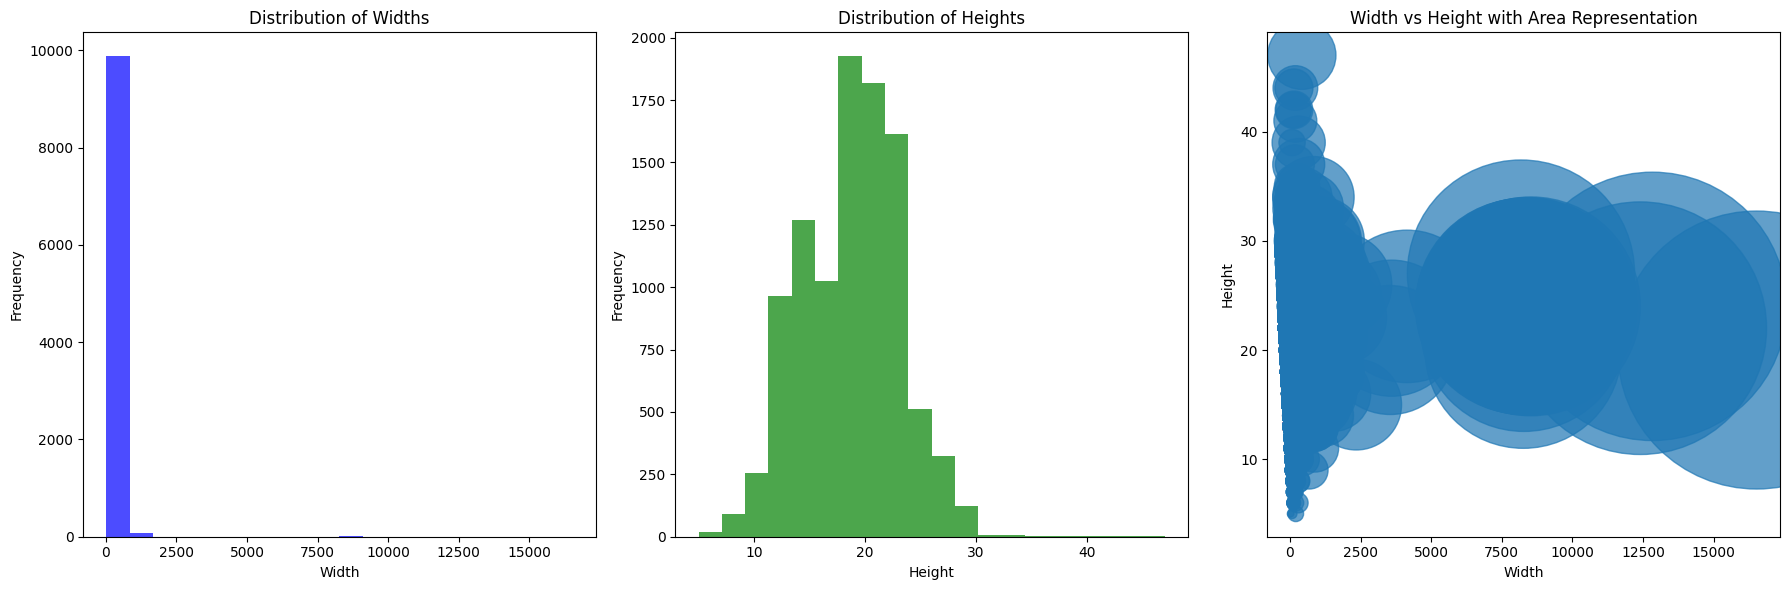

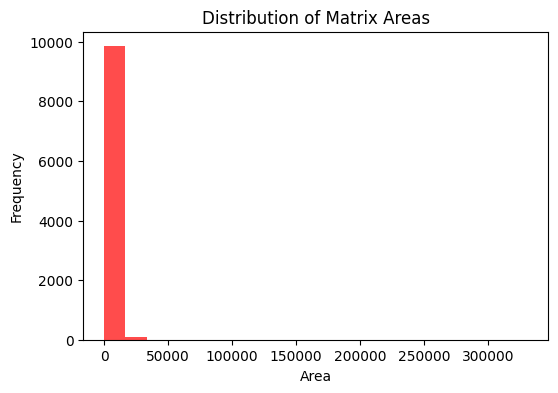

In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt

np_convert_dir = 'irish_binary_auto2'

# Lists to store dimension and area data
dimension_data = []
area_data = []
file_names = []

# Variables to track maximum width and height
max_width = max_height = 0
max_width_file = max_height_file = ''

for file in os.listdir(np_convert_dir):
    if file.endswith('.npy'):
        file_path = os.path.join(np_convert_dir, file)
        matrix = np.load(file_path)
        dimension_data.append(matrix.shape)
        area_data.append(matrix.shape[0] * matrix.shape[1])  # Calculate area and store
        file_names.append(file)

        # Check for maximum width and height
        if matrix.shape[1] > max_width:
            max_width = matrix.shape[1]
            max_width_file = file
        if matrix.shape[0] > max_height:
            max_height = matrix.shape[0]
            max_height_file = file

# Determine the file with the largest and smallest dimensions
max_dim = max(dimension_data)
min_dim = min(dimension_data)
max_dim_file = file_names[dimension_data.index(max_dim)]
min_dim_file = file_names[dimension_data.index(min_dim)]

# Total number of matrices
total_matrices = len(dimension_data)

print(f"Total number of matrices: {total_matrices}")
print(f"File with largest dimensions: {max_dim_file} with dimensions {max_dim}")
print(f"File with smallest dimensions: {min_dim_file} with dimensions {min_dim}")
print(f"File with the largest width: {max_width_file} with width {max_width}")
print(f"File with the largest height: {max_height_file} with height {max_height}")

# Plotting
widths = [dim[1] for dim in dimension_data]
heights = [dim[0] for dim in dimension_data]

plt.figure(figsize=(18, 6))

# Histogram of widths and heights
plt.subplot(1, 3, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(heights, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Scatter plot of widths vs heights with area representation
plt.subplot(1, 3, 3)
area_sizes = [20 * (area / min(area_data)) for area in area_data]  # Scale area for visibility
plt.scatter(widths, heights, s=area_sizes, alpha=0.7)
plt.title('Width vs Height with Area Representation')
plt.xlabel('Width')
plt.ylabel('Height')

plt.tight_layout()
plt.show()

# Histogram of Areas
plt.figure(figsize=(6, 4))
plt.hist(area_data, bins=20, color='red', alpha=0.7)
plt.title('Distribution of Matrix Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()


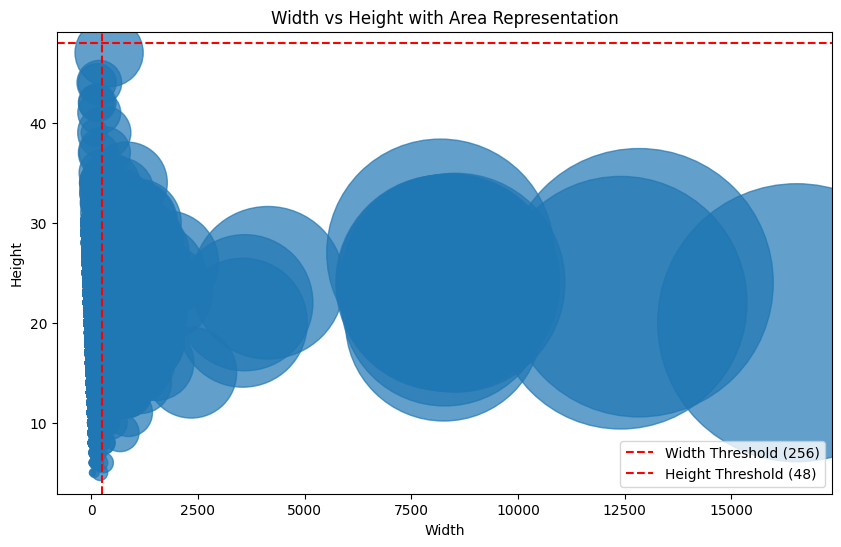

Amount of files with width greater than 256: 2464 or 24.73%
Amount of files with height greater than 48: 0 or 0.00%


In [11]:
import matplotlib.pyplot as plt

# Assuming the scatter plot code and necessary variables (widths, heights, area_sizes) are already defined above

# Plot the scatter plot again for context
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, s=area_sizes, alpha=0.7)
plt.title('Width vs Height with Area Representation')
plt.xlabel('Width')
plt.ylabel('Height')

# Define your thresholds
width_threshold = 256  # Adjust this value for width as needed
height_threshold = 48  # Adjust this value for height as needed

# Draw red rulers at the threshold values
plt.axvline(x=width_threshold, color='r', linestyle='--', label=f'Width Threshold ({width_threshold})')
plt.axhline(y=height_threshold, color='r', linestyle='--', label=f'Height Threshold ({height_threshold})')

# Add a legend to clarify the plot
plt.legend()

plt.show()

# Initialize counters for files exceeding the respective thresholds
files_above_width_threshold = 0
files_above_height_threshold = 0

# Iterate and count files exceeding each threshold
for file_name, dimensions in zip(file_names, dimension_data):
    width, height = dimensions[1], dimensions[0]
    
    if width > width_threshold:
        files_above_width_threshold += 1
        
    if height > height_threshold:
        files_above_height_threshold += 1

# Calculate and print the percentages of files filtered out by each threshold
total_files = len(dimension_data)
percentage_filtered_by_width = (files_above_width_threshold / total_files) * 100
percentage_filtered_by_height = (files_above_height_threshold / total_files) * 100

print(f"Amount of files with width greater than {width_threshold}: {files_above_width_threshold} or {percentage_filtered_by_width:.2f}%")
print(f"Amount of files with height greater than {height_threshold}: {files_above_height_threshold} or {percentage_filtered_by_height:.2f}%")


In [12]:
import numpy as np

initial_width_threshold = 256  # This defines the threshold

# Initialize a list to keep track of very small matrices' dimensions
very_small_matrices_sizes = []

# Initialize a counter for the total number of adjusted matrices
total_adjusted = 0

# Adjust for Very Small Matrices
adjusted_widths = []
for name, width, height in zip(file_names, widths, heights):
    # If the matrix width is smaller than half the initial threshold (128)
    if width < initial_width_threshold / 2:  
        adjusted_widths.append(width * 2)  # Double the width for very small matrices
        very_small_matrices_sizes.append((width * 2, height))  # Store the adjusted size
        total_adjusted += 1  # Increment the counter
        # Print the original and adjusted size for each very small matrix, including its name
        print(f"Very small matrix adjusted: {name} - Original Width = {width}, Adjusted Width = {width * 2}, Height = {height}")
    else:
        # For matrices that aren't considered 'very small', keep the original width
        adjusted_widths.append(width)

# After all adjustments, print the total number of adjusted matrices
print(f"Total number of very small matrices adjusted: {total_adjusted}")

# Display the findings
print(f"Initial width threshold: {initial_width_threshold}")


Very small matrix adjusted: binary_matrix_0.npy - Original Width = 89, Adjusted Width = 178, Height = 22
Very small matrix adjusted: binary_matrix_10.npy - Original Width = 98, Adjusted Width = 196, Height = 15
Very small matrix adjusted: binary_matrix_1004.npy - Original Width = 97, Adjusted Width = 194, Height = 17
Very small matrix adjusted: binary_matrix_1010.npy - Original Width = 72, Adjusted Width = 144, Height = 13
Very small matrix adjusted: binary_matrix_1018.npy - Original Width = 66, Adjusted Width = 132, Height = 15
Very small matrix adjusted: binary_matrix_1021.npy - Original Width = 80, Adjusted Width = 160, Height = 22
Very small matrix adjusted: binary_matrix_1023.npy - Original Width = 108, Adjusted Width = 216, Height = 13
Very small matrix adjusted: binary_matrix_1024.npy - Original Width = 64, Adjusted Width = 128, Height = 16
Very small matrix adjusted: binary_matrix_1027.npy - Original Width = 116, Adjusted Width = 232, Height = 15
Very small matrix adjusted: bin

Adjusted and saved: irish_binary_auto2_adjusted\binary_matrix_0_adjusted.npy
Copied without adjustment: irish_binary_auto2_adjusted\binary_matrix_1.npy
Adjusted and saved: irish_binary_auto2_adjusted\binary_matrix_10_adjusted.npy
Copied without adjustment: irish_binary_auto2_adjusted\binary_matrix_100.npy
Copied without adjustment: irish_binary_auto2_adjusted\binary_matrix_1000.npy
Copied without adjustment: irish_binary_auto2_adjusted\binary_matrix_1001.npy
Copied without adjustment: irish_binary_auto2_adjusted\binary_matrix_1002.npy
Copied without adjustment: irish_binary_auto2_adjusted\binary_matrix_1003.npy
Adjusted and saved: irish_binary_auto2_adjusted\binary_matrix_1004_adjusted.npy
Copied without adjustment: irish_binary_auto2_adjusted\binary_matrix_1005.npy
Copied without adjustment: irish_binary_auto2_adjusted\binary_matrix_1006.npy
Copied without adjustment: irish_binary_auto2_adjusted\binary_matrix_1007.npy
Copied without adjustment: irish_binary_auto2_adjusted\binary_matri

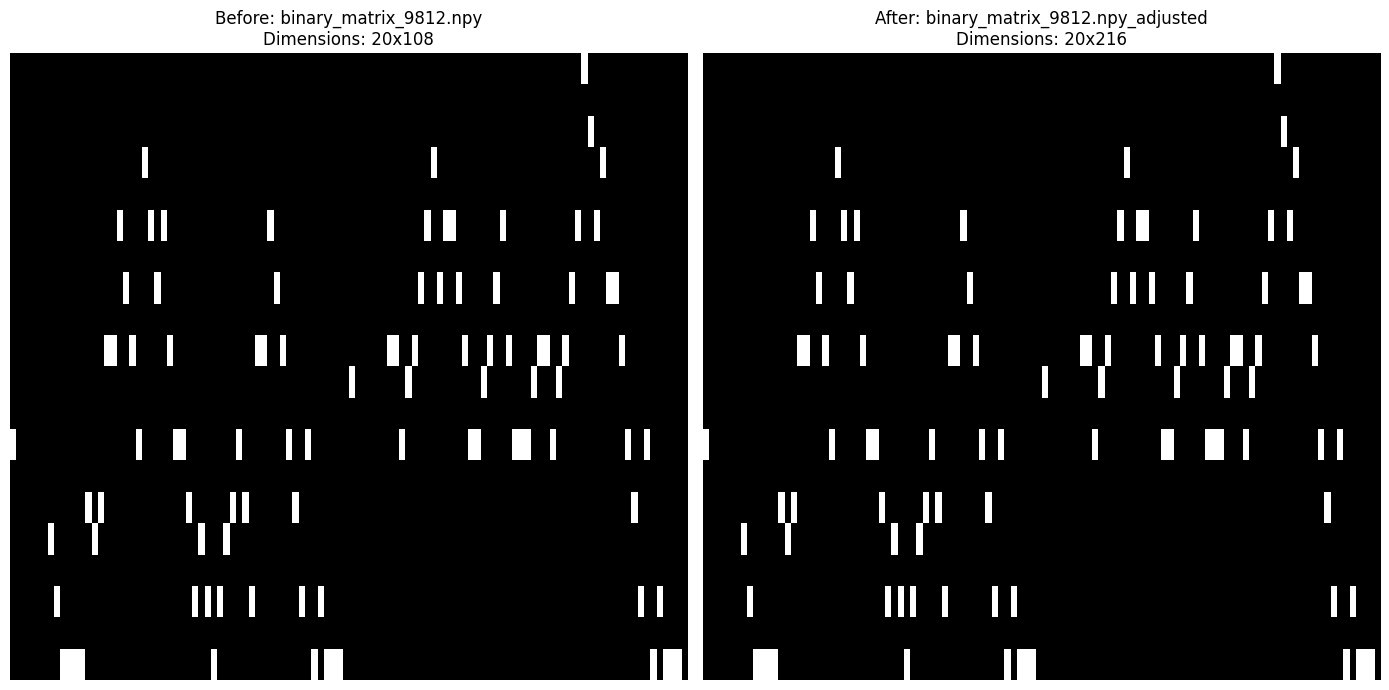

In [14]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

np_convert_dir = 'irish_binary_auto2'
np_convert_dir_adjusted = 'irish_binary_auto2_adjusted'

# Ensure the new directory exists
if not os.path.exists(np_convert_dir_adjusted):
    os.makedirs(np_convert_dir_adjusted)

initial_width_threshold = 256  # Fixed initial threshold as per your earlier logic
total_adjusted = 0
adjusted_files = []  # Track names of adjusted files

# Function to double the width of the matrix
def double_matrix_width(matrix):
    return np.repeat(matrix, 2, axis=1)

# Iterate over files and adjust width if necessary
for name, width, height in zip(file_names, widths, heights):
    file_path = os.path.join(np_convert_dir, name)
    matrix = np.load(file_path)
    adjusted_file_path = os.path.join(np_convert_dir_adjusted, f"{name.split('.')[0]}_adjusted.npy")
    
    # If the width is smaller than half the threshold (128), adjust it
    if width < initial_width_threshold / 2:
        adjusted_matrix = double_matrix_width(matrix)
        np.save(adjusted_file_path, adjusted_matrix)
        total_adjusted += 1
        adjusted_files.append((name, adjusted_matrix))  # Store name and adjusted matrix
        print(f"Adjusted and saved: {adjusted_file_path}")
    else:
        # If no adjustment is needed, simply copy the file to the new directory
        shutil.copy(file_path, np_convert_dir_adjusted)
        print(f"Copied without adjustment: {os.path.join(np_convert_dir_adjusted, name)}")

# Print the total number of matrices adjusted
print(f"Total number of very small matrices adjusted: {total_adjusted}")

# If there are any adjusted files, select one randomly for plotting
if adjusted_files:
    example_name, example_after = adjusted_files[np.random.randint(len(adjusted_files))]
    example_before = np.load(os.path.join(np_convert_dir, example_name))  # Load the original for comparison

    # Plotting the selected adjusted file
    plt.figure(figsize=(14, 7))
    
    # Plot the original matrix
    plt.subplot(1, 2, 1)
    plt.title(f"Before: {example_name}\nDimensions: {example_before.shape[0]}x{example_before.shape[1]}")
    plt.imshow(example_before, cmap='gray', aspect='auto')
    plt.axis('off')

    # Plot the adjusted matrix
    plt.subplot(1, 2, 2)
    plt.title(f"After: {example_name}_adjusted\nDimensions: {example_after.shape[0]}x{example_after.shape[1]}")
    plt.imshow(example_after, cmap='gray', aspect='auto')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
